In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import itertools

In [2]:
pd.options.display.max_colwidth=800
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('datasets/SatisfactionClients/cdiscount_retraite.csv', index_col=0)
df_test = pd.read_csv('datasets/SatisfactionClients/amazon_test1.csv', index_col=0)
df.sample(3)

,pays,note,titre,commentaire,Commentaire_filtre,titre_filtre
67970,FR,5,trop genial,22 juin 2020Vérifiétrop genialtrop genial simple et pas du tout cherDate de l'expérience: 22 juin 2020,"['juin', 'vérifiétrop', 'genialtrop', 'genial', 'simple', 'tout', 'cherdate', 'expérience', 'juin']","['trop', 'genial']"
63877,FR,4,bon site,"9 août 2020Vérifiébon sitebon site, prix attractifsDate de l'expérience: 09 août 2020","['vérifiébon', 'sitebon', 'site', 'prix', 'attractifsdate', 'expérience']","['bon', 'site']"
66008,FR,3,J'avoue que Cdiscount est un bon site…,"12 juil. 2020J'avoue que Cdiscount est un bon site…J'avoue que Cdiscount est un bon site rapport qualité et prix mais leurs services n'est pas vraiment au top, pour avoir des informations il faut rappeler un numéro surtaxé, le pire on peut même envoyer un message (une réclamation) a partir notre espace client.Date de l'expérience: 12 juillet 2020","['juil', 'avoue', 'cdiscount', 'bon', 'site', 'avoue', 'cdiscount', 'bon', 'site', 'rapport', 'qualité', 'prix', 'leurs', 'services', 'vraiment', 'top', 'avoir', 'informations', 'faut', 'rappeler', 'numéro', 'surtaxé', 'pire', 'peut', 'envoyer', 'message', 'réclamation', 'partir', 'espace', 'client', 'date', 'expérience', 'juillet']","['avoue', 'cdiscount', 'bon', 'site']"


In [4]:
# séparation de la variable cible et des variables explicatives
X = df['Commentaire_filtre']
y = df['note']

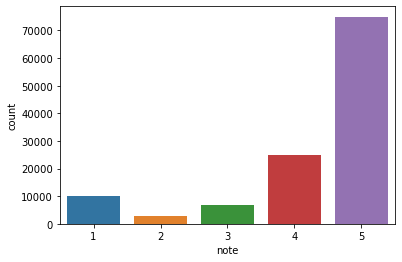

In [5]:
import seaborn as sns
sns.countplot(x='note', data=df);

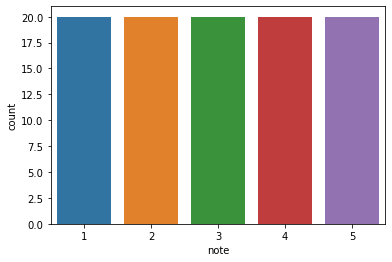

In [6]:
sns.countplot(x='note', data=df_test);

In [7]:
# séparation du jeu de données en un dataset d'entrainement et un dataset de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [8]:
# conversion des chaines de caratères en tokens numériques
# on ne prendra que les éléments répétés au moins 3 fois avec min_df=3
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=14000, ngram_range=[2, 3])
X_train = vectorizer.fit_transform(X_train).todense()
X_test = vectorizer.transform(X_test).todense()

In [9]:
print(X_train.shape)
print(X_test.shape)
print(df_test.shape)

(96000, 14000)
(24000, 14000)
(100, 4)


In [10]:
vectorizer.get_feature_names()

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abonnement annuel',
 'abonnement cdiscount',
 'abonnement cdiscount volonté',
 'abonnement date',
 'abonnement date expérience',
 'abonnement discount',
 'abonnement discount volonté',
 'abonnement euros',
 'abonnement jamais',
 'abonnement livraison',
 'abonnement livraison gratuite',
 'abonnement volonté',
 'abonné cdiscount',
 'abonné cdiscount volonté',
 'abonnée cdiscount',
 'abordable date',
 'abordable date expérience',
 'abordable livraison',
 'abordabledate expérience',
 'abordablesdate expérience',
 'absolument date',
 'absolument date expérience',
 'absolument rien',
 'abus confiance',
 'accessible ici',
 'accueil téléphonique',
 'accusé réception',
 'accèsdate expérience',
 'achat bien',
 'achat bon',
 'achat car',
 'achat carte',
 'achat cdiscount',
 'achat cette',
 'achat chez',
 'achat chez cdiscount',
 'achat comme',
 'achat date',
 'achat date expérience',
 'achat depuis',
 'achat discount',
 'achat donc',
 'achat effectué',
 'achat euros',
 'achat facile',
 'achat f

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [12]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(clf.score(X_test, y_test), end='\n\n')

cr = classification_report(y_test, y_pred)
print(cr)

cm = pd.crosstab(y_test, y_pred, rownames=['données réelles'], colnames=['predictions'])
display(cm)

# vérification des résultats sur un jeu de test externe (100 commentaires amazon également répartis entre les étoiles)
df_test_token = vectorizer.transform(df_test['commentaire']).todense()
y_predict_test = clf.predict(df_test_token)

cm_test = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'])
display(cm_test)

cm_test2 = pd.crosstab(df_test['note'], y_predict_test, rownames=['données réelles'], colnames=['predictions'], normalize=0)
display(cm_test2)

for i in cm_test2.index:
    for j in cm_test2.columns :
        if (i==j and cm_test2.loc[i, j] > 0.5) :
            print("les prédictions correctes sont supérieures à 50% pour {} étoile(s) avec {} %".format(i, cm_test2.loc[i, j]*100))

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.647625

              precision    recall  f1-score   support

           1       0.62      0.65      0.64      2008
           2       0.13      0.03      0.05       625
           3       0.24      0.16      0.19      1312
           4       0.34      0.22      0.27      5035
           5       0.73      0.86      0.79     15020

    accuracy                           0.65     24000
   macro avg       0.41      0.39      0.39     24000
weighted avg       0.60      0.65      0.62     24000



predictions,1,2,3,4,5
données réelles,,,,,
1,1314,36,104,133,421
2,212,20,90,85,218
3,197,30,210,283,592
4,185,25,210,1112,3503
5,211,41,244,1637,12887


C:\Users\t.fourtouill\Anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


predictions,1,3,4,5
données réelles,,,,
1,15,1,0,4
2,9,1,2,8
3,4,0,4,12
4,9,1,2,8
5,4,2,4,10


predictions,1,3,4,5
données réelles,,,,
1,0.75,0.05,0.0,0.2
2,0.45,0.05,0.1,0.4
3,0.20,0.00,0.2,0.6
4,0.45,0.05,0.1,0.4
5,0.20,0.10,0.2,0.5


les prédictions correctes sont supérieures à 50% pour 1 étoile(s) avec 75.0 %


In [13]:
from joblib import dump
dump(clf, 'datasets/SatisfactionClients/model_rf_tfidf_ngrams_2_3.jolib')

['datasets/SatisfactionClients/model_rf_tfidf_ngrams_2_3.jolib']